WeatherPy
==============

Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
from scipy.stats import linregress
from scipy import stats
# Impor the OpenWeatherMap API key
from api_keys import api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

Generate the Cities List by using citipy library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 637


Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude.
Use the OpenWeatherMap API to retrieve the weather data from the cities list generated in the starter code. 

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = 'metric'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={api_key}&units={units}&q="
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url + city).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto ayora
Processing Record 2 of Set 1 | arraial do cabo
Processing Record 3 of Set 1 | comodoro rivadavia
Processing Record 4 of Set 1 | ribeira grande
Processing Record 5 of Set 1 | rena
Processing Record 6 of Set 1 | east london
Processing Record 7 of Set 1 | carnarvon
Processing Record 8 of Set 1 | epe
Processing Record 9 of Set 1 | vaini
Processing Record 10 of Set 1 | lata
Processing Record 11 of Set 1 | pisco
Processing Record 12 of Set 1 | locri
Processing Record 13 of Set 1 | saint anthony
Processing Record 14 of Set 1 | jamestown
Processing Record 15 of Set 1 | cidreira
Processing Record 16 of Set 1 | hilo
Processing Record 17 of Set 1 | tasiilaq
Processing Record 18 of Set 1 | elizabeth city
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | mahibadhoo
Processing Record 21 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 22 of Set 1 | dubo

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64

In [5]:
# Look at data types and fix before moving on
city_data_df.dtypes

City           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
Country        object
Date            int64
dtype: object

In [6]:
# Fix date to be datetime64
city_data_df = city_data_df.astype({"Date": "datetime64[s]"})

In [7]:
# Check data types again
city_data_df.dtypes

City                  object
Lat                  float64
Lng                  float64
Max Temp             float64
Humidity               int64
Cloudiness             int64
Wind Speed           float64
Country               object
Date          datetime64[ns]
dtype: object

In [8]:
# Display sample data
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto ayora,-0.7393,-90.3518,30.98,88,100,2.24,EC,2023-04-03 19:57:21
1,arraial do cabo,-22.9661,-42.0278,26.98,61,40,3.60,BR,2023-04-03 19:57:35
2,comodoro rivadavia,-45.8667,-67.5000,20.92,28,0,9.26,AR,2023-04-03 19:58:08
3,ribeira grande,38.5167,-28.7000,15.43,72,40,5.66,PT,2023-04-03 19:57:22
4,rena,61.1348,11.3641,-1.86,98,100,0.93,NO,2023-04-03 20:00:34
5,east london,-33.0153,27.9116,19.37,69,46,8.23,ZA,2023-04-03 19:57:22
6,carnarvon,-24.8667,113.6333,23.95,75,7,6.45,AU,2023-04-03 19:57:22
7,epe,6.5841,3.9834,26.13,85,100,2.93,NG,2023-04-03 20:00:34
8,vaini,-21.2000,-175.2000,25.09,83,20,3.09,TO,2023-04-03 19:57:19
9,lata,40.1629,-8.3327,16.07,80,100,1.91,PT,2023-04-03 19:53:57


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("C:/Users/tsswi/python-api-challenge/output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("C:/Users/tsswi/python-api-challenge/output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto ayora,-0.7393,-90.3518,30.98,88,100,2.24,EC,2023-04-03 19:57:21
1,arraial do cabo,-22.9661,-42.0278,26.98,61,40,3.60,BR,2023-04-03 19:57:35
2,comodoro rivadavia,-45.8667,-67.5000,20.92,28,0,9.26,AR,2023-04-03 19:58:08
3,ribeira grande,38.5167,-28.7000,15.43,72,40,5.66,PT,2023-04-03 19:57:22
4,rena,61.1348,11.3641,-1.86,98,100,0.93,NO,2023-04-03 20:00:34


Create Scatter Plots
--------------------------

Latitude vs Temperature 

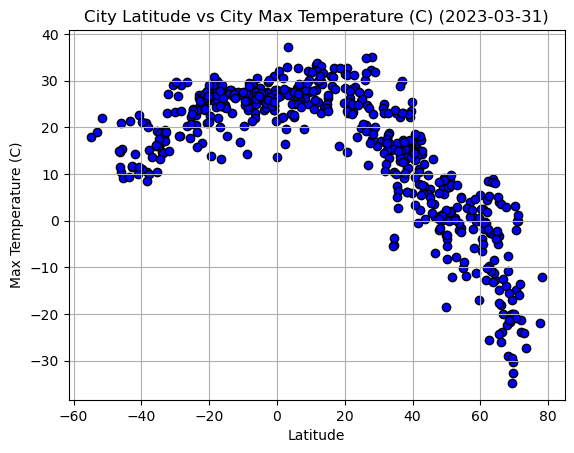

In [11]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_values_temp = city_data_df["Max Temp"]

# Incorporate the other graph properties
plt.scatter(x_values, y_values_temp, marker="o", facecolors = 'blue', edgecolors = 'black')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs City Max Temperature (C) (2023-03-31)")
plt.grid()

# Save the figure
plt.savefig("C:/Users/tsswi/python-api-challenge/output_data/Fig1.png")

# Show plot
plt.show()

Latitude vs Humidity

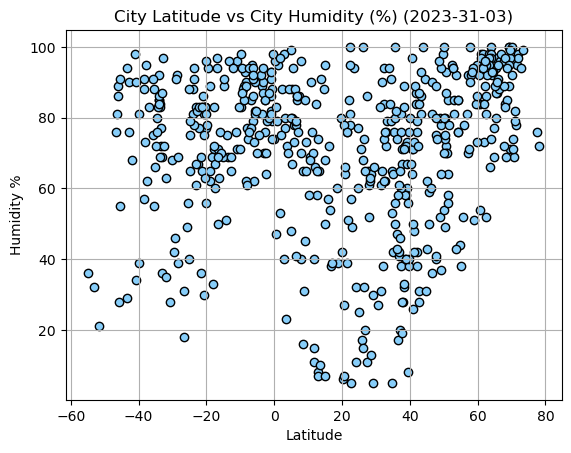

In [12]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"]
y_values_humidity = city_data_df["Humidity"]

# Incorporate the other graph properties
plt.scatter(x_values, y_values_humidity, marker="o", facecolors = 'lightskyblue', edgecolors = 'black')
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.title("City Latitude vs City Humidity (%) (2023-31-03)")
plt.grid()

# Save the figure
plt.savefig("C:/Users/tsswi/python-api-challenge/output_data/Fig2.png")

# Show plot
plt.show()

Latitude vs Cloudiness 

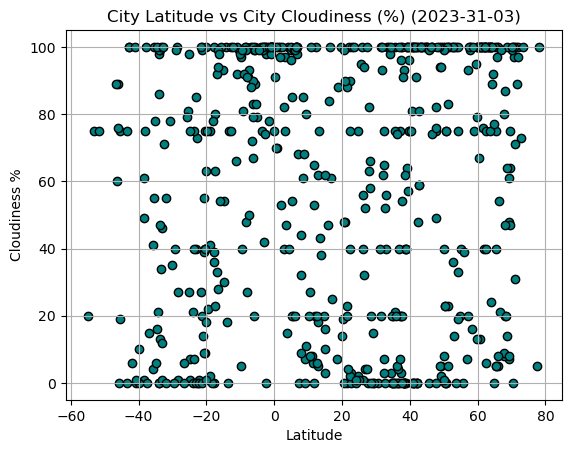

In [13]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"]
y_values_clouds = city_data_df["Cloudiness"]

# Incorporate the other graph properties
plt.scatter(x_values, y_values_clouds, marker="o", facecolors = 'teal', edgecolors = 'black')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.title("City Latitude vs City Cloudiness (%) (2023-31-03)")
plt.grid()

# Save the figure
plt.savefig("C:/Users/tsswi/python-api-challenge/output_data/Fig3.png")

# Show plot
plt.show()

Latitude vs Wind Speed Plot

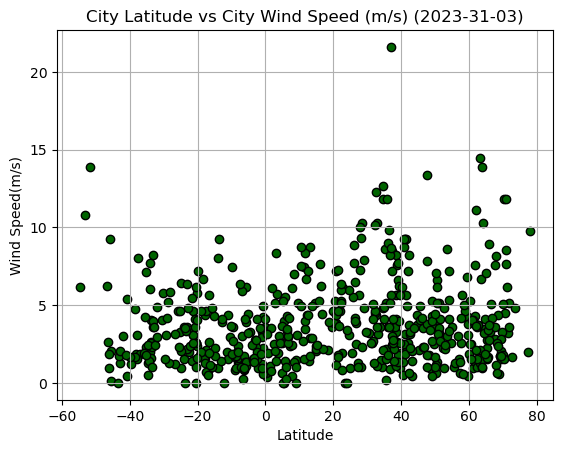

In [14]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"]
y_values_wind = city_data_df["Wind Speed"]

# Incorporate the other graph properties
plt.scatter(x_values, y_values_wind, marker="o", facecolors = "darkgreen", edgecolors = 'black')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(m/s)")
plt.title("City Latitude vs City Wind Speed (m/s) (2023-31-03)")
plt.grid()

# Save the figure
plt.savefig("C:/Users/tsswi/python-api-challenge/output_data/Fig4.png")

# Show plot
plt.show()

Linear Regression on Scatter Plots
--------------------------------------------------

In [17]:
# Define a function to create Linear Regression plots
#(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values_x)

In [18]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,ribeira grande,38.5167,-28.7000,15.43,72,40,5.66,PT,2023-04-03 19:57:22
4,rena,61.1348,11.3641,-1.86,98,100,0.93,NO,2023-04-03 20:00:34
7,epe,6.5841,3.9834,26.13,85,100,2.93,NG,2023-04-03 20:00:34
9,lata,40.1629,-8.3327,16.07,80,100,1.91,PT,2023-04-03 19:53:57
11,locri,38.2414,16.2623,11.30,89,93,2.70,IT,2023-04-03 20:00:35


In [19]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto ayora,-0.7393,-90.3518,30.98,88,100,2.24,EC,2023-04-03 19:57:21
1,arraial do cabo,-22.9661,-42.0278,26.98,61,40,3.60,BR,2023-04-03 19:57:35
2,comodoro rivadavia,-45.8667,-67.5000,20.92,28,0,9.26,AR,2023-04-03 19:58:08
5,east london,-33.0153,27.9116,19.37,69,46,8.23,ZA,2023-04-03 19:57:22
6,carnarvon,-24.8667,113.6333,23.95,75,7,6.45,AU,2023-04-03 19:57:22


Temperature vs Latitude Linear Regression

In [20]:
# Linear regression on Northern Hemisphere
x_values_north = northern_hemi_df["Lat"]
y_values_north_temp = northern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_north, y_values_north_temp)

regress_values_north = x_values_north * slope + intercept
print(regress_values_north)

City_ID
3      10.545048
4      -4.627472
7      31.965858
9       9.440756
11     10.729723
         ...    
558     5.410376
560     4.314267
561    -5.289363
563     0.736619
568    -9.590483
Name: Lat, Length: 373, dtype: float64


In [21]:
#create line equation
line_eq_north_temp = 'y = ' + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Print line equation
print(line_eq_north_temp)

y = -0.67x + 36.38


The r-value is: 0.7611625617427366


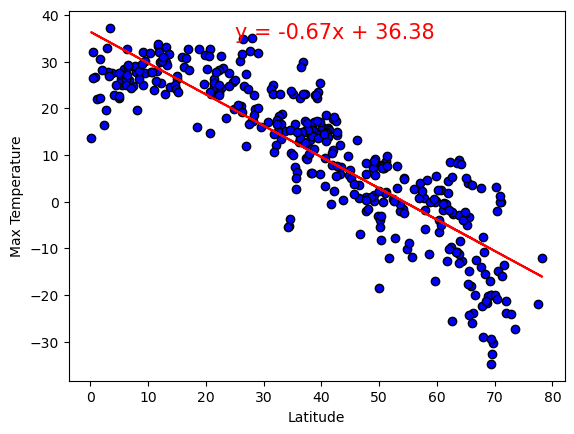

In [22]:
# Plot with line equation
plt.scatter(x_values_north, y_values_north_temp, marker="o", facecolors = 'blue', edgecolors = 'black')
plt.plot(x_values_north, regress_values_north, "r")

# Label plot
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.annotate(line_eq_north_temp, (25,35), fontsize=15, color='r')

#Print the r value
print(f"The r-value is: {rvalue**2}")

plt.show()

In [23]:
# Linear regression on Southern Hemisphere
x_values_south = southern_hemi_df["Lat"]
y_values_south_temp = southern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_south, y_values_south_temp)

regress_values_south = x_values_south * slope + intercept
print(regress_values_south)

City_ID
0      28.036050
1      22.014724
2      15.810864
5      19.292357
6      21.499844
         ...    
562    21.253755
564    21.418573
565    26.039299
566    22.755050
567    17.181176
Name: Lat, Length: 196, dtype: float64


In [24]:
#create line equation
line_eq_south_temp = 'y = ' + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Print line equation
print(line_eq_south_temp)

y = 0.27x + 28.24


The r-value is: 0.46501771207266096


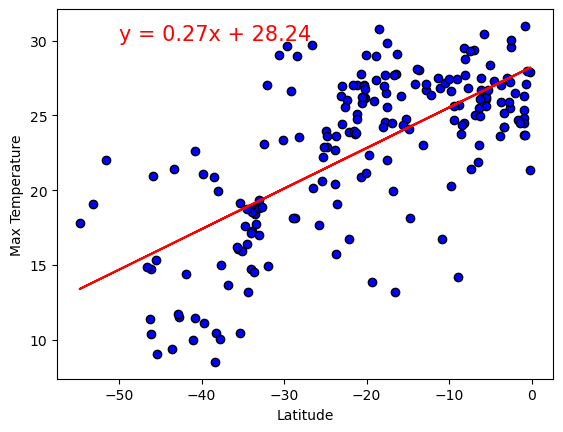

In [25]:
# Plot with line equation
plt.scatter(x_values_south, y_values_south_temp, marker="o", facecolors = 'blue', edgecolors = 'black')
plt.plot(x_values_south, regress_values_south, "r")

# Label plot
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.annotate(line_eq_south_temp, (-50,30), fontsize=15, color='r')

#Print the r value
print(f"The r-value is: {rvalue**2}")

plt.show()

Discussion about linear relationship: Linear relationships can be easily explained with the r-value associated with the plot. The closer an r-value is to 1 (or -1) the more perfect the linear relationship. On the northern hemisphere plot depicting temperature vs latitude, the r-value is 0.77, indicating a strong linear relationship. This make sense as when one starts at the equator in the northern hemisphere, temperatures only start to plummet past the 42nd latitude. On the southern hemisphere, we see the linear relationship is weaker. This r-value is 0.38, indicating there is somewhat of a relationship between temperature and latitude, but also indicating there might be other factors at play here. Temperatures seem to drop more quickly as one starts at the equator and travels south - there are penguins at the southernmost tip of Argentina. 
The linear relationship between temperature and latitude is more pronounced in the northern hemisphere. 

Humidity vs Latitude Linear Regression

In [26]:
# Northern Hemisphere
x_values_north = northern_hemi_df["Lat"]
y_values_n_hum = northern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_north, y_values_n_hum)

regress_values_n_hum = x_values_north * slope + intercept
print(regress_values_n_hum)

City_ID
3      69.189255
4      78.226400
7      56.430468
9      69.847001
11     69.079258
         ...    
558    72.247599
560    72.900470
561    78.620640
563    75.031409
568    81.182498
Name: Lat, Length: 373, dtype: float64


In [27]:
#create line equation
line_eq_n_hum = 'y = ' + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Print line equation
print(line_eq_n_hum)

y = 0.4x + 53.8


The r-value is: 0.11744509761495943


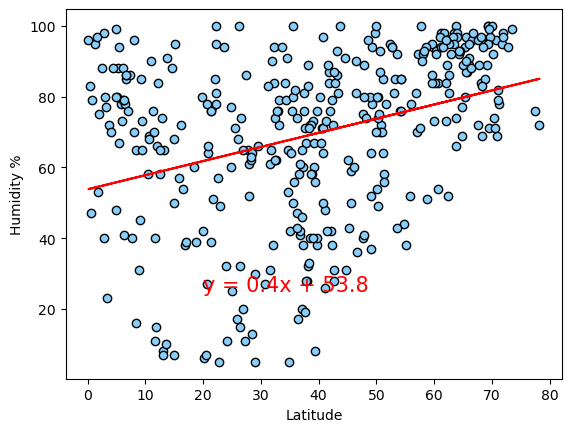

In [28]:
# Plot with line equation
plt.scatter(x_values_north, y_values_n_hum, marker="o", facecolors = 'lightskyblue', edgecolors = 'black')
plt.plot(x_values_north, regress_values_n_hum, "r")

# Label plot
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.annotate(line_eq_n_hum, (20,25), fontsize=15, color='r')

#Print the r value
print(f"The r-value is: {rvalue**2}")

plt.show()

In [29]:
# Southern Hemisphere
x_values_south = southern_hemi_df["Lat"]
y_values_s_hum = southern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_south, y_values_s_hum)

regress_values_s_hum = x_values_south * slope + intercept
print(regress_values_s_hum)

City_ID
0      83.042155
1      73.978788
2      64.640667
5      69.881051
6      73.203785
         ...    
562    72.833369
564    73.081455
565    80.036623
566    75.093135
567    66.703277
Name: Lat, Length: 196, dtype: float64


In [30]:
#create line equation
line_eq_s_hum = 'y = ' + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Print line equation
print(line_eq_s_hum)

y = 0.41x + 83.34


The r-value is: 0.0997770533577458


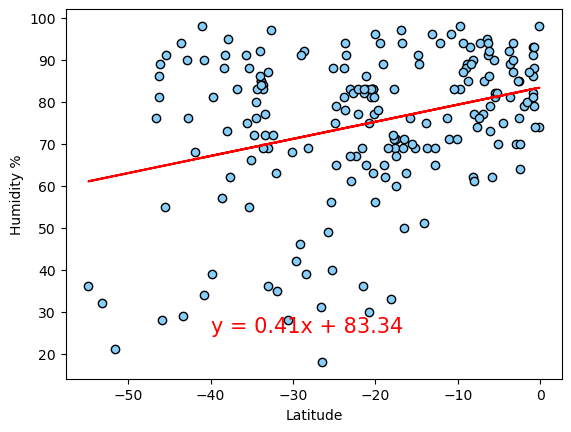

In [31]:
# Plot with line equation
plt.scatter(x_values_south, y_values_s_hum, marker="o", facecolors = 'lightskyblue', edgecolors = 'black')
plt.plot(x_values_south, regress_values_s_hum, "r")

# Label plot
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.annotate(line_eq_s_hum, (-40,25), fontsize=15, color='r')

#Print the r value
print(f"The r-value is: {rvalue**2}")

plt.show()

Discussion about linear relationship: Above, on the northern hemisphere plot between latitude and humidity, we can see the r-value is 0.14. This tells us there is a very weak linear relationship between humidity and latitude. This is similar to the southern hemisphere plot between humidity and latitude, the r-value is 0.06. This tells us the correlation on the south hemisphere is very weak as well. From simply observing the plots, one can surmise the linear relationship is not strong; there are datapoints all around the regression line indicating most datapoints fall outside of that relationship.
Perhaps humidity and temperature don't have the strongest linear relationship because humidity can be influenced by several factors; the amount of available water in the region, the geography/topography of the region, and the amount of plant life as well. 

Cloudiness vs Latitude Linear Regression

In [32]:
# Northern Hemisphere
x_values_north = northern_hemi_df["Lat"]
y_values_n_cloud = northern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_north, y_values_n_cloud)

regress_values_n_cloud = x_values_north * slope + intercept
print(regress_values_n_cloud)

City_ID
3      56.653560
4      61.882338
7      49.271486
9      57.034123
11     56.589917
         ...    
558    58.423079
560    58.800821
561    62.110440
563    60.033756
568    63.592699
Name: Lat, Length: 373, dtype: float64


In [33]:
#create line equation
line_eq_n_cloud = 'y = ' + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Print line equation
print(line_eq_n_cloud)

y = 0.23x + 47.75


The r-value is: 0.014352910504735243


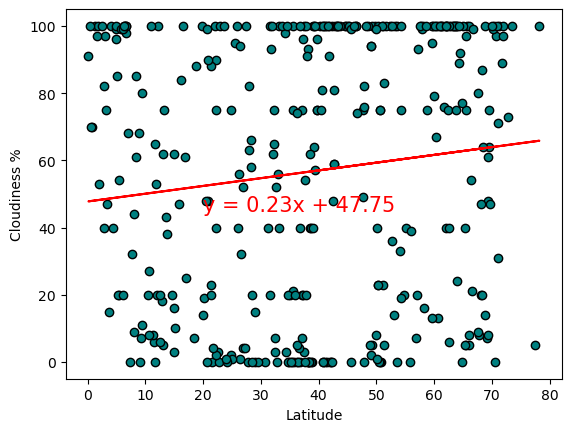

In [34]:
# Plot with line equation
plt.scatter(x_values_north, y_values_n_cloud, marker="o", facecolors = 'teal', edgecolors = 'black')
plt.plot(x_values_north, regress_values_n_cloud, "r")

# Label plot
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.annotate(line_eq_n_cloud, (20,45), fontsize=15, color='r')

#Print the r value
print(f"The r-value is: {rvalue**2}")

plt.show()

In [35]:
# Southern Hemisphere
x_values_south = southern_hemi_df["Lat"]
y_values_s_cloud = southern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_south, y_values_s_cloud)

regress_values_s_cloud = x_values_south * slope + intercept
print(regress_values_s_cloud)

City_ID
0      81.139310
1      57.307364
2      32.752959
5      46.532444
6      55.269509
         ...    
562    54.295508
564    54.947844
565    73.236323
566    60.237518
567    38.176553
Name: Lat, Length: 196, dtype: float64


In [36]:
#create line equation
line_eq_s_cloud = 'y = ' + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Print line equation
print(line_eq_s_cloud)

y = 1.07x + 81.93


The r-value is: 0.14628860387937068


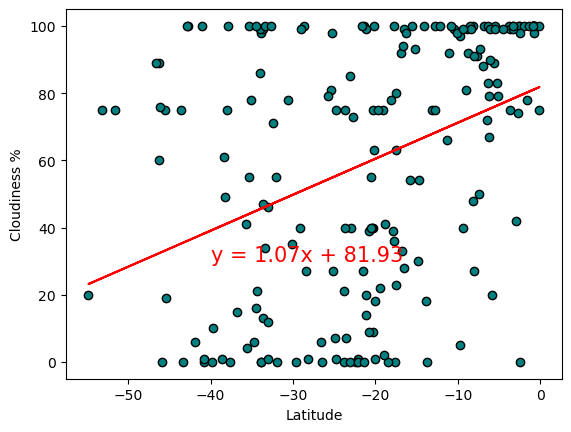

In [37]:
# Plot with line equation
plt.scatter(x_values_south, y_values_s_cloud, marker="o", facecolors = 'teal', edgecolors = 'black')
plt.plot(x_values_south, regress_values_s_cloud, "r")

# Label plot
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.annotate(line_eq_s_cloud, (-40,30), fontsize=15, color='r')

#Print the r value
print(f"The r-value is: {rvalue**2}")

plt.show()

Discussion about linear regression: In both cases, the linear relationship is almost null. Both r-values are 0.042, very close to zero. It is slightly surprising to me there is almost no linear relationship between cloudiness and latitude; I would have assumed elevation and therefore latitude would have an effect on local weather. However, there are many other factors that influence cloud formation, such as mountains (rain shadow effect), plant life and ambient temperature. However, cloud formation is most influenced by humidity. From our other graphs it is apparent the linear relationship between latitude and humidity is weak, and therefore it is safe for us to assume the linear relationship between latitude and cloud formation would be weak as well.

Wind Speed vs Latitude Linear Regression 

In [38]:
# Northern Hemisphere
x_values_north = northern_hemi_df["Lat"]
y_values_n_wind = northern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_north, y_values_n_wind)

regress_values_n_wind = x_values_north * slope + intercept
print(regress_values_n_wind)

City_ID
3      4.028998
4      4.135751
7      3.878282
9      4.036768
11     4.027699
         ...   
558    4.065125
560    4.072838
561    4.140408
563    4.098010
568    4.170671
Name: Lat, Length: 373, dtype: float64


In [39]:
#create line equation
line_eq_n_wind = 'y = ' + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Print line equation
print(line_eq_n_wind)

y = 0.0x + 3.85


The r-value is: 0.0011237489375216254


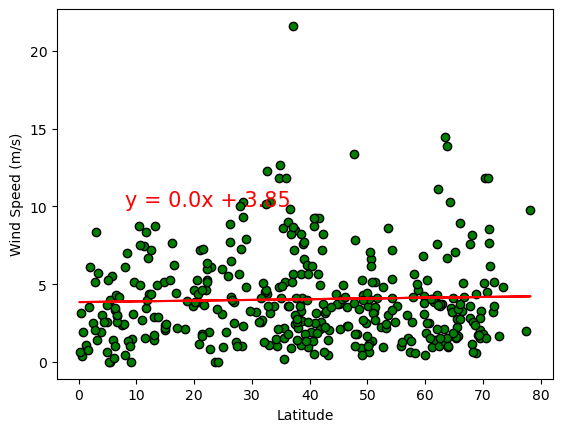

In [40]:
# Plot with line equation
plt.scatter(x_values_north, y_values_n_wind, marker="o", facecolors = 'green', edgecolors = 'black')
plt.plot(x_values_north, regress_values_n_wind, "r")

# Label plot
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.annotate(line_eq_n_wind, (8,10), fontsize=15, color='r')

#Print the r value
print(f"The r-value is: {rvalue**2}")

plt.show()

In [41]:
# Southern Hemisphere
x_values_south = southern_hemi_df["Lat"]
y_values_s_wind = southern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_south, y_values_s_wind)

regress_values_s_wind = x_values_south * slope + intercept
print(regress_values_s_wind)

City_ID
0      2.380538
1      3.083487
2      3.807746
5      3.401305
6      3.143595
         ...   
562    3.172325
564    3.153083
565    2.613645
566    2.997059
567    3.647771
Name: Lat, Length: 196, dtype: float64


In [42]:
#create line equation
line_eq_s_wind = 'y = ' + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Print line equation
print(line_eq_s_wind)

y = -0.03x + 2.36


The r-value is: 0.03989085814563655


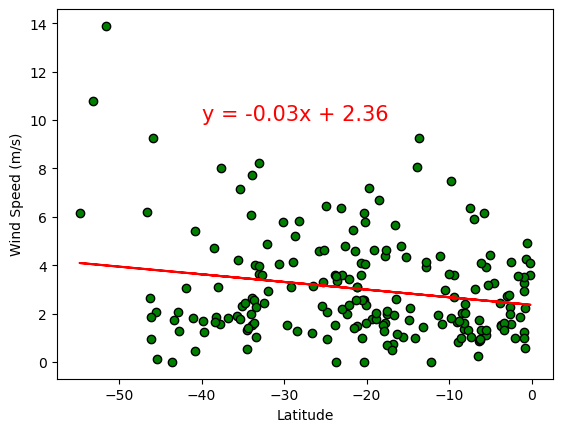

In [43]:
# Plot with line equation
plt.scatter(x_values_south, y_values_s_wind, marker="o", facecolors = 'green', edgecolors = 'black')
plt.plot(x_values_south, regress_values_s_wind, "r")
plt.annotate(line_eq_s_wind, (-40,10), fontsize=15, color='r')

# Label plot
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

#Print the r value
print(f"The r-value is: {rvalue**2}")
plt.show()

Discussion about linear regression: Here again we see a very weak linear relationship between wind speed and latitude. The r-value for the northern and southern hemispheres is under 0.05, a very small value indicating a weak linear relationship. This is not surprising as wind is finnicky and can be influenced by many factors. Wind speed is primarily influenced by friction, air pressure, the rotation of the earth and seasonal changes. While latitude can play a small part in this through temperature, it can only account for ambient temperature changes.